In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA_DIR_TRAIN = os.path.join("..", "data", 'cs-train')
DATA_DIR_PROD = os.path.join("..", "data", 'cs-production')

In [11]:
df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,price,stream_id,times_viewed
0,United Kingdom,13085.0,489434,6.95,85048,12.0,2017,11,28,NaN,NaN,NaN
1,United Kingdom,NaN,489597,8.65,22130,1.0,2017,11,28,NaN,NaN,NaN
2,United Kingdom,NaN,489597,1.70,22132,6.0,2017,11,28,NaN,NaN,NaN
3,United Kingdom,NaN,489597,1.70,22133,4.0,2017,11,28,NaN,NaN,NaN
4,United Kingdom,NaN,489597,0.87,22134,1.0,2017,11,28,NaN,NaN,NaN


In [39]:
df = pd.DataFrame()

data_filenames = [f for f in os.listdir(DATA_DIR_TRAIN) if os.path.isfile(os.path.join(DATA_DIR_TRAIN, f))]
data_filenames = sorted(data_filenames)

for filename in data_filenames:
    invoice_filename = os.path.join(DATA_DIR, filename)   
    _df = pd.read_json(invoice_filename)
    _df = _df.rename(columns={
        'total_price': 'price',
        'StreamID': 'stream_id',
        'TimesViewed': 'times_viewed'
    })
    df = df.append(_df)

# Set types
for _col in ['year', 'month', 'day']:
    df[_col] = df[_col].astype('str')
df["date"] = pd.to_datetime(df['year']+'-'+df['month']+'-'+df['day'])

for _col in ['country', 'invoice', 'customer_id', 'stream_id']:
    df[_col] = df[_col].astype('category')

df = df[['date', 'price', 'times_viewed', 'stream_id', 'country', 'customer_id', 'invoice']]

# Remove outliers
# outlier_borders = [df['price'].quantile(0.01), df['price'].quantile(0.99)]
# df = df[df['price'].apply(lambda x: outlier_borders[0]<x<outlier_borders[1])]
    
print('Date range {} -- {}'.format(df['date'].min(), df['date'].max()))
for _col in ['country', 'invoice', 'customer_id', 'stream_id']:
    print('{} nunique: {}'.format(_col, df[_col].nunique()))
    
df.head()

Date range 2017-11-28 00:00:00 -- 2019-07-31 00:00:00
country nunique: 43
invoice nunique: 42646
customer_id nunique: 5225
stream_id nunique: 5007


,date,price,times_viewed,stream_id,country,customer_id,invoice
0,2017-11-28,6.95,12,85048,United Kingdom,13085.0,489434
1,2017-11-28,8.65,1,22130,United Kingdom,NaN,489597
2,2017-11-28,1.70,6,22132,United Kingdom,NaN,489597
3,2017-11-28,1.70,4,22133,United Kingdom,NaN,489597
4,2017-11-28,0.87,1,22134,United Kingdom,NaN,489597


In [40]:
df.describe()

,price,times_viewed
count,815011.000000,815011.000000
mean,4.802631,5.231106
std,135.058707,5.109982
min,-53594.360000,0.000000
25%,1.250000,1.000000
50%,2.100000,3.000000
75%,4.210000,8.000000
max,38970.000000,24.000000


In [41]:
# Remove outliers
outlier_borders = [df['price'].quantile(0.01), df['price'].quantile(0.99)]
df = df[df['price'].apply(lambda x: outlier_borders[0]<x<outlier_borders[1])]

print('After removing outliers.')
print('Date range {} -- {}'.format(df['date'].min(), df['date'].max()))
for _col in ['country', 'invoice', 'customer_id', 'stream_id']:
    print('{} nunique: {}'.format(_col, df[_col].nunique()))

After removing outliers.
Date range 2017-11-28 00:00:00 -- 2019-07-31 00:00:00
country nunique: 43
invoice nunique: 37128
customer_id nunique: 5160
stream_id nunique: 4543


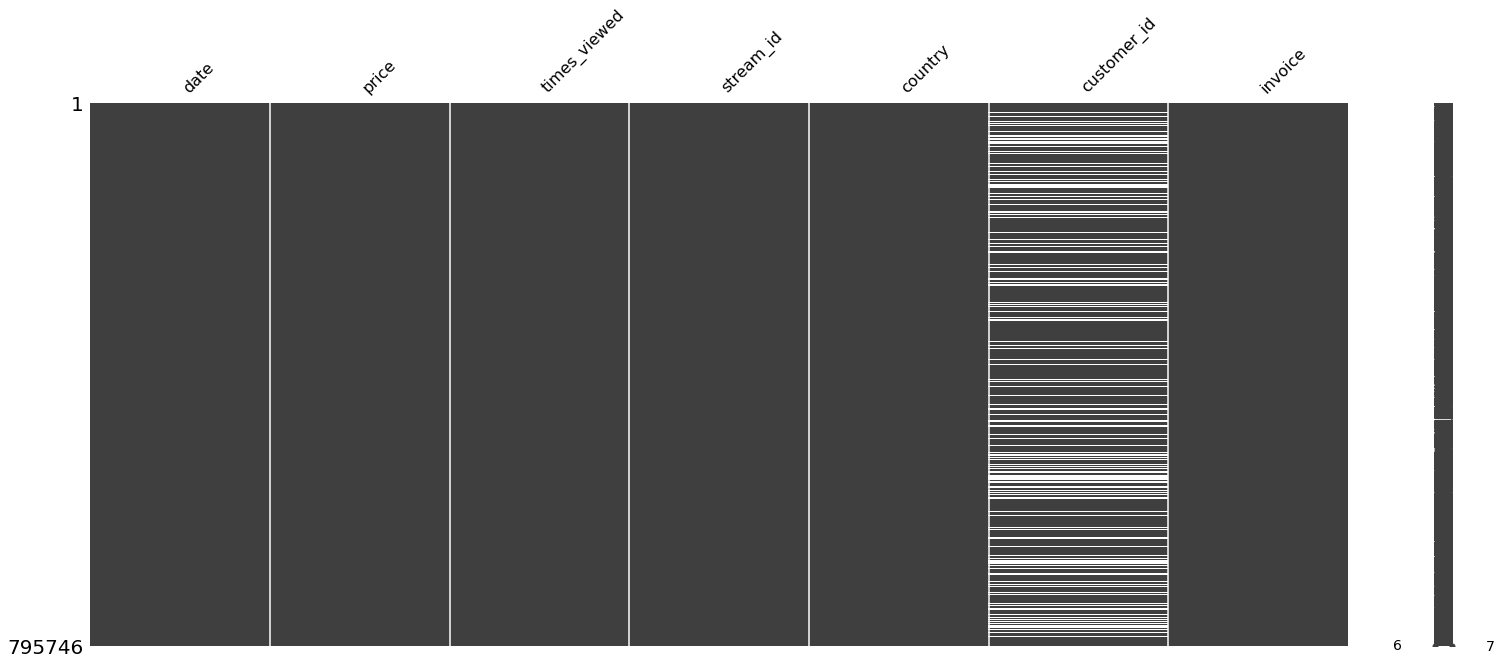

In [42]:
msno.matrix(df)
plt.show()

In [43]:
df['invoice'].value_counts()

537434    1316
538071    1270
537638    1178
537823    1168
537237    1164
          ... 
530871       0
500027       0
530870       0
530869       0
536554       0
Name: invoice, Length: 42646, dtype: int64

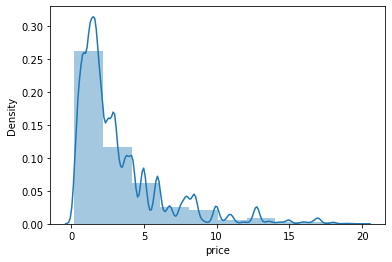

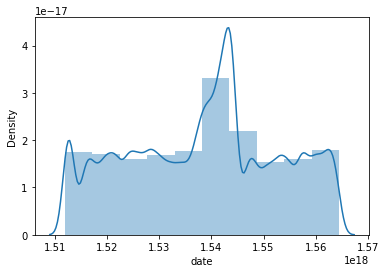

In [57]:
sns.distplot(df['price'], bins=10)
plt.show()

sns.distplot(df['date'], bins=10)
plt.show()

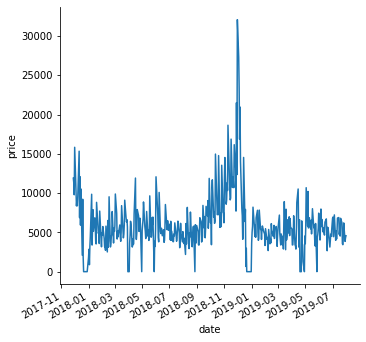

In [47]:
g = sns.relplot(x='date', y='price', data=df.groupby(pd.Grouper(key='date', freq='B')).sum().reset_index(), kind='line')
g.fig.autofmt_xdate()

In [53]:
revenue_by_country = df[['country', 'price']].groupby('country').sum().sort_values('price', ascending=False)
revenue_by_country = revenue_by_country.rename(columns={'price': 'revenue'})
revenue_by_country = revenue_by_country.reset_index()
revenue_by_country.head()

,country,revenue
0,United Kingdom,2.394573e+06
1,EIRE,4.548577e+04
2,Germany,4.347583e+04
3,France,3.065637e+04
4,Netherlands,9.845600e+03


In [54]:
df['country'].value_counts()

United Kingdom          733290
Germany                  13198
EIRE                     13194
France                    9734
Netherlands               3995
Spain                     2507
Switzerland               2257
Belgium                   2143
Portugal                  1760
Australia                 1534
Channel Islands           1253
Sweden                    1100
Italy                     1019
Cyprus                     892
Norway                     770
Finland                    720
Austria                    680
Greece                     616
Unspecified                609
Denmark                    591
Japan                      510
United Arab Emirates       449
Poland                     424
Singapore                  295
Hong Kong                  269
USA                        263
Canada                     219
Malta                      213
Iceland                    195
Lithuania                  188
Israel                     139
Bahrain                    126
RSA     